In [2]:

def text2video(text:str = None):
    output = input2morse(text)
    return output

def morse2wav(arr):
    scaled = np.int16(arr/np.max(np.abs(arr)) * 32767)
    write_wav('outt.wav', 44100, scaled)


def wav2text(file:str = None):
    try:
        decoded = MorseCode.from_wavfile(file).decode()
        sys.stdout.write(decoded + "\n")
    except UserWarning as err:
        sys.stderr.write(f"{err}\n")
        sys.exit(1)


def video2image():
    pass

def image2wav(image='output.png', out='output.wav'):
    img = Image.open(image)
    ar = np.asarray(img)
    ar = ar.flatten()
    ar2 = []
    ar3 = []
    for i in range(int(len(ar)/3)):
        nt = []
        nt.append(ar[i])
        nt.append(ar[i+1])
        nt.append(ar[i+2])
        ar2.append(nt)
    ar2 = np.array(ar2)
    for i in range(len(ar2)):
        #print(rgb2wve(ar2[i]))
        ar3.append(rgb2wve(ar2[i]))
    return ar3

import numpy as np
from scipy.io.wavfile import write as write_wav
from PIL import Image
import cv2, os
import ffmpeg

def rgb2wve(n):
    s = 0
    s += int(n[0]*256**2)
    s += int(n[1]*256)
    s += int(n[2])
    return s

import numpy as  np


def wve2rgb(ln):
    n1=ln // 256 // 256 % 256
    n2=ln //256%256
    n3=ln % 256
    return np.array([n1,n2,n3])

def pa2sp(ar):
    n = ar.shape[0]
    n2 = np.ceil(np.sqrt(n))**2

    nd = n2 - n
    new_pa = np.append(pa, (15.0, 66.0, 64.0)*int(nd))
    return new_pa

def arr2rgb(arr):
    arr2 = []
    for i in range(len(arr)):
        arr2.append(wve2rgb(arr[i]*10**6))
    return arr2


def find_shape_difference(inp):
    l = inp.__len__()
    l2 = (np.ceil(np.sqrt(l)))**2
    return l2-l, int(np.sqrt(l2))


def arr2image(arr):
    fsd = find_shape_difference(arr)
    new_array = np.append(arr, ([1,1,1]*int(fsd[0])))
    new_array = new_array.reshape(fsd[1],fsd[1],3)
    return new_array

def tune(ar):
    np.savetxt('.temp.csv',ar,'%5.6f')
    ar = np.loadtxt('.temp.csv')
    ar2 = (ar+1)*10**6
    np.savetxt('.temp.csv',ar2,'%5.0f')
    ar2 = np.loadtxt('.temp.csv')
    np.savetxt('.temp2.csv',ar2,'%5.0f')

    return ar2

def savearrayasimg(ar):
    ar = np.array(ar, dtype=np.uint8)

    img = Image.fromarray(ar)
    img = img.convert('RGB')
    img.save('output.png')


def cd(inpt:str = None):
    arwv = image2wav(str)
    arwv = np.array(arwv, dtype=np.uint8)
    

def ce(text:str = None):
    ar = text2video(text)
    np.savetxt('ar.csv',ar)
    ar = tune(ar)
    ar = arr2rgb(ar)
    ar = arr2image(ar)
    savearrayasimg(ar)
    p2v('output.png')
    #frames2video('/home/salih/cryp/cryptology-project/frames', 'cikis.mp4')


def p2v(img):
    img = Image.open(img)
    img = img.convert('RGB')
    img = np.asarray(img)
    ar = np.array_split(img , int(img.shape[0]/1.0))
    ar = np.array(ar, dtype=np.uint8)
    
    for i in range(len(ar)):
        for j in range(len(ar[i])): 
            for k in range(len(ar[i][j])):
                ar2 = ar[i][j][k]
                ar2 = ar2.reshape(1,1,3)
                frame = Image.fromarray(ar2,'RGB')
                frame.save(f'/home/salih/cryp/cryptology-project/frames/{(i+1)}.png')
def frames2video(folder, out):
    video = ffmpeg.input(f'{folder}/*.png', pattern_type='glob', framerate=200)
    video = ffmpeg.output(video, out)
    ffmpeg.run(video)
    '''
        images = []
        for i in os.listdir(folder):
            global shape
            frame = cv2.imread(i)
            if i.startswith('0'):
                shape = np.asarray(i).shape
        c =  cv2.VideoWriter_fourcc(*'mp4v')
        outv = cv2.VideoWriter(out, c, 1, (shape[0], shape[1]))
        for img in images:
            outv.write(cv2.imread(os.path.join(folder, img)))
            outv.release()
    '''

In [3]:
import sounddevice as sd
from PIL import Image

def image2wav(image='output.png', out='output.wav'):
    img = Image.open(image)
    ar = np.asarray(img)
    ar = ar.flatten()
    ar2 = []
    ar3 = []
    for i in range(int(len(ar)/3)):
        nt = []
        nt.append(ar[i])
        nt.append(ar[i+1])
        nt.append(ar[i+2])
        ar2.append(nt)
    ar2 = np.array(ar2)
    for i in range(len(ar2)):
        #print(rgb2wve(ar2[i]))
        ar3.append(rgb2wve(ar2[i]))
    return np.array(ar3)


In [4]:
def morse2wav(arr:np.ndarray) -> str:
    #scaled = np.int8(arr/np.max(np.abs(arr))* (32767))
    #print(scaled)
    write_wav("out.wav", 44100, arr)

import sys
def wav2text(file:str = None):
    decoded = MorseCode.from_wavfile(file).decode()
    sys.stdout.write(decoded + "\n")

def ar2text(ar):
    for i in range(len(ar)):
        if ar[i] == 0:
            ar[i] = 0
        else:
            ar[i] = 1
    return ar
def arbin2short(ar):
    strar = ""
    for i in ar:
        strar += str(int(i))
    return strar.split('10')

def short2morse(ar):
    ar2 = []
    ar3 = []
    for i in ar:
        ar2.append(len(i))
    for i in ar2:
        if i > 4000:
            ar3.append('-')
        else:
            ar3.append('.')
    o = ""
    for i in ar3:
        o += str(i)
    return ar2



In [5]:
imgpath = "/home/salih/cryp/cryptology-project/output.png"

In [6]:
i2w = image2wav(imgpath)


In [7]:
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
print(t)
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

[0.00000000e+00 2.26762512e-05 4.53525023e-05 ... 9.99954647e-01
 9.99977324e-01 1.00000000e+00]


In [8]:
#!usr/bin/env python  
#coding=utf-8  

import pyaudio  
import wave  

#define stream chunk   
chunk = 1024  

#open a wav format music  
f = wave.open(r"/home/salih/cryp/cryptology-project/libcrypto/outt.wav","rb")  
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = f.readframes(chunk)  

#play stream  
while data:  
    stream.write(data)  
    data = f.readframes(chunk)  
    print(data)

#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate()  

b'6\x17\xcd\x13\x9f\x10\xad\r\xfe\n\x92\x08o\x06\x97\x04\x0c\x03\xd0\x01\xe5\x00K\x00\x05\x00\x11\x00q\x00#\x01&\x02z\x03\x1d\x05\x0c\x07E\t\xc5\x0b\x89\x0e\x8d\x11\xcd\x14F\x18\xf2\x1b\xcd\x1f\xd1#\xfb\'C,\xa50\x1c5\xa09,>\xbbBFG\xc8K;P\x98T\xdbX\xfd\\\xfa`\xccdnh\xdck\x11o\x08r\xbft1w[y;{\xce|\x12~\x06\x7f\xa7\x7f\xf6\x7f\xf2\x7f\x9b\x7f\xf1~\xf5}\xa9|\x0f{\'y\xf5v|t\xbfq\xc1n\x87k\x14hld\x96`\x95\\oX*T\xcaOUK\xd2FFB\xb8=,9\xa9440\xd4+\x8f\'i#h\x1f\x92\x1b\xea\x17w\x14=\x11?\x0e\x82\x0b\t\t\xd7\x06\xef\x04U\x03\t\x02\r\x01c\x00\x0c\x00\x08\x00W\x00\xf8\x00\xec\x010\x03\xc3\x04\xa3\x06\xcd\x08?\x0b\xf6\r\xed\x10"\x14\x90\x172\x1b\x04\x1f\x01##\'f+\xc3/64\xb88C=\xd2A^F\xe2JYO\xbbS\x03X-\\1`\x0cd\xb8g1kqnuq9t\xb9v\xf2x\xe1z\x84|\xd8}\xdb~\x8d\x7f\xed\x7f\xf9\x7f\xb3\x7f\x19\x7f.~\xf2|g{\x8fylw\x00uQr_o1l\xc8h+e^ae]FY\x07U\xacP;L\xbaG0C\xa1>\x14:\x8f5\x171\xb2,g(:$2 S\x1c\xa2\x18$\x15\xdd\x11\xd3\x0e\t\x0c\x82\tA\x07K\x05\xa1\x03E\x029\x01\x7f\x00\x17\x00\x02\x00@\x00\xd2\x00\xb5\x01\xe9

In [9]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

In [10]:
samplerate, data = wavfile.read("example.wav")
length = data.shape[0] / samplerate
print(f"length = {length}s")



length = 1.0s


In [11]:
import scipy as sp

import wave
w = wave.open('/home/salih/cryp/cryptology-project/libcrypto/outt.wav', 'r')
for i in range(w.getnframes()):
    frame = w.readframes(i)
    print(frame.encode('utf-8'))



AttributeError: 'bytes' object has no attribute 'encode'

In [ ]:
import numpy as np
import sounddevice as sd
from text2morse import input2morse
def morse2wav(inpt):
    ar2 = []
    for i in inpt:
        if i == ".":
            ar2.append(0)
            for _ in range(1):
                ar2.append(0)
                ar2.append(5)
        elif i == "-":
            ar2.append(0)
            for _ in range(1):
                ar2.append(10)
        elif i == " ":
            for _ in range(1):
                ar2.append(20)
        else:
            return ValueError
    ar2 = np.array(ar2)
    ar2 = list(ar2)
    for i in range(len(ar2)):
        ar2[i] = [ar2[i]]*2
    return np.array(ar2, dtype=np.float32).flatten()

morse2wav('.-.-')
#np.savetxt('test1423.csv',morse2wav('..---').flatten(),'%5.0f')
np.savetxt('test2342345:csv',input2morse(input='eett'),'%0.20f')

In [ ]:
def wav2morse(ar):
    o = ""
    for i in ar:
        o+=str(i)
    return o.replace('.','').replace('5','.').replace('10','-').replace('20',' ').replace('0','')

wav2morse(morse2wav('..- --'))

AttributeError: 'str' object has no attribute 'dtype'

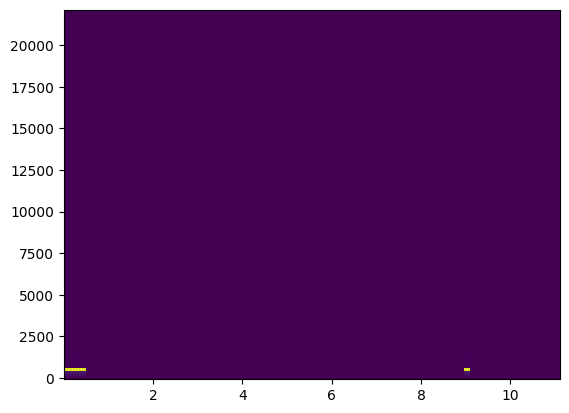

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from text2morse import input2morse


wavfile.write(filename='outtt.wav',data=input2morse(input='et'),rate=44100)

sample_rate, samples = wavfile.read('outtt.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(times, frequencies, spectrogram)


#plt.imshow(spectrogram)

#val = samples
#for i in range(len(val)):
#    if val[i] == np.min(val):
#        print(np.max(val), i+1);
#    elif val[i] == np.max(val):
#        print(np.max(val), i+1);



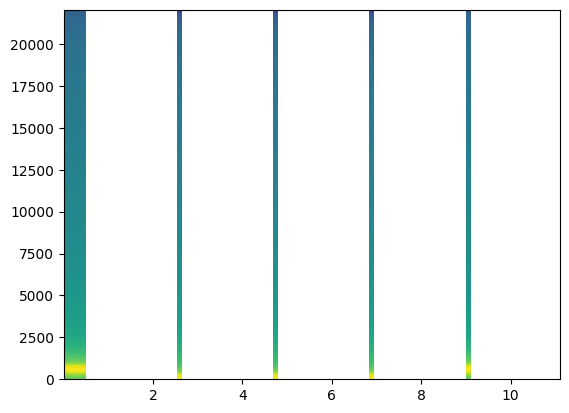

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

Fs, aud = wavfile.read('outtt.wav')
aud = aud
first = aud[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
np.savetxt('frkansa.csv',first,'%1.2f')

In [14]:
from text2morse import input2morse

def ce(text:str = None):
    ar = text2video(text)
    np.savetxt('ar.csv',ar)
    ar = tune(ar)
    #sd.play(ar)

    ar = arr2rgb(ar)
    ar = arr2image(ar)
    savearrayasimg(ar)
    p2v('output.png')
    frames2video('/home/salih/cryp/cryptology-project/frames', 'cikis.mp4')
ce('etet')


KeyboardInterrupt: 